<a href="https://colab.research.google.com/github/RomanKunal/Machine-Learning/blob/main/Outlier2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Removal of outlier using IQR applied on skewed graph

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("/content/placement.csv")
data.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<ipython-input-4-ff37eaf05a16>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['cgpa'])
<ipython-input-4-ff37eaf05a16>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['placement_exam_marks'])


<function matplotlib.pyplot.show(close=None, block=None)>

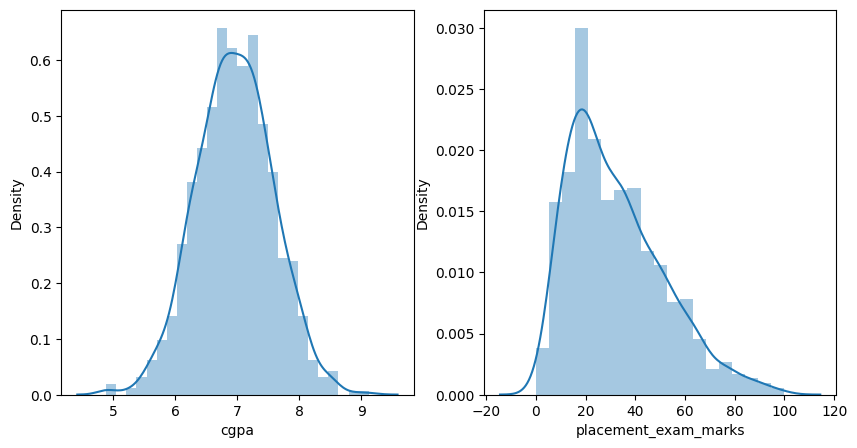

In [4]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(data['cgpa'])
plt.subplot(1,2,2)
sns.distplot(data['placement_exam_marks'])
plt.show

In [5]:
data['placement_exam_marks'].describe()


count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

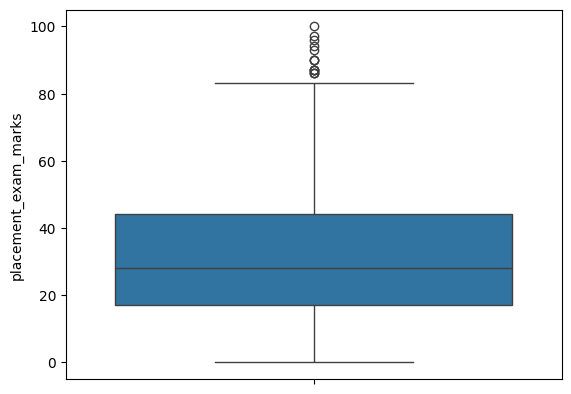

In [6]:
sns.boxplot(data['placement_exam_marks'])


In [7]:
# Finding the IQR
percentile25 = data['placement_exam_marks'].quantile(0.25)
percentile75 = data['placement_exam_marks'].quantile(0.75)

In [8]:
percentile25

17.0

In [9]:
percentile75

44.0

In [11]:
iqr= percentile75-percentile25
iqr

27.0

In [12]:
upper_limit= percentile75+1.5*iqr
lower_limit= percentile25-1.5*iqr
print(upper_limit)
print(lower_limit)

84.5
-23.5


In [13]:
newdata=data.loc[(data['placement_exam_marks']>lower_limit)&(data['placement_exam_marks']<upper_limit)]
newdata

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


# CAPPING

In [14]:
data['placement_exam_marks']=np.where(
    data['placement_exam_marks']>upper_limit,
    upper_limit,
    np.where(
        data['placement_exam_marks']<lower_limit,
        lower_limit,
        data['placement_exam_marks']
    )
)

In [15]:
data.shape

(1000, 3)

In [16]:
data.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.136500,0.489000
std,0.615898,18.865419,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,84.500000,1.000000
